In [1]:
###new on Jul 15

# a) The expression for the gradient ∇f(x) can be derived as follows: ∇f(x) = p * A^T * (|Ax - b|^(p-1)) * sign(Ax - b)

# where sign is the element-wise sign function, * denotes element-wise multiplication, and |.|^(p-1) denotes element-wise power.

# Here is a Python implementation of the gd function using gradient descent with backtracking line search:


import numpy as np

def gd(A, b, p, x0):
    x = x0
    grad_norms = []
    alpha = 0.25
    beta = 0.5
    while True:
        residual = A @ x - b
        grad_f = p * A.T @ ((np.abs(residual)**(p-1)) * np.sign(residual))

        grad_norms.append(np.linalg.norm(grad_f))
        if len(grad_norms) > 1 and grad_norms[-1] / grad_norms[0] <= 1e-6:
            break
        t = 1
        while np.sum(np.abs(A @ (x - t * grad_f) - b)**p) > np.sum(np.abs(residual)**p) - alpha * t * np.sum(grad_f**2):
            t *= beta
        x -= t * grad_f
    return x, grad_norms



In [2]:
import numpy as np
from scipy.linalg import solve

def newton(A, b, p, x0):
    x = x0
    grad_norms = []
    while True:
        residual = A @ x - b
        grad_f = p * A.T @ ((np.abs(residual)**(p-1)) * np.sign(residual))

        grad_norms.append(np.linalg.norm(grad_f))
        if len(grad_norms) > 1 and grad_norms[-1] / grad_norms[0] <= 1e-6:
            break
        hessian_f = p * (p - 1) * A.T @ np.diag(np.abs(residual)**(p-2)) @ A
        hessian_f = (hessian_f + hessian_f.T) / 2
        dx = solve(hessian_f, -grad_f)
        x += dx
    return x, grad_norms


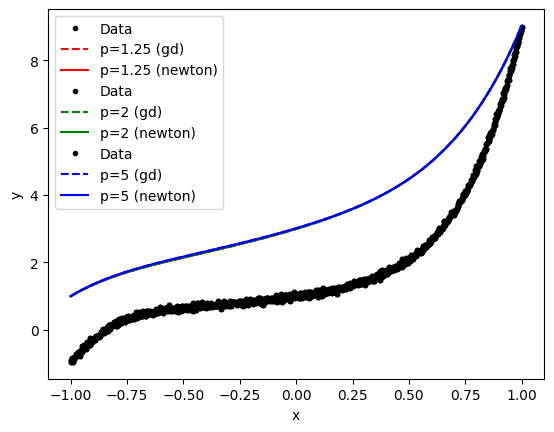

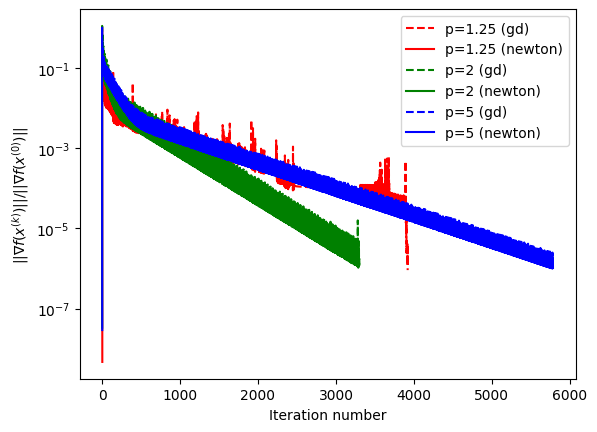

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate test data
np.random.seed(0)
n_points = 1000
x_data = np.linspace(-1, 1, n_points)
y_data = 3*x_data**5 + 2*x_data**4 + x_data**3 + x_data**2 + x_data + 1 + np.random.normal(scale=0.05, size=n_points)

# Construct A and b matrices for least squares problem
A = np.vander(x_data, N=6)
b = y_data

# Solve minimization problem for different values of p using both algorithms
x0 = np.zeros(6)
ps = [1.25, 2, 5]
colors = ['r', 'g', 'b']
for i in range(len(ps)):
    p = ps[i]
    x_star_gd, grad_norms_gd = gd(A, b, p, x0)
    x_star_newton, grad_norms_newton = newton(A, b, p, x0)
    
    # Plot optimized polynomial and original data
    plt.figure(0)
    plt.plot(x_data, y_data, 'k.', label='Data')
    plt.plot(x_data, np.polyval(x_star_gd[::-1], x_data), colors[i]+'--', label=f'p={p} (gd)')
    plt.plot(x_data, np.polyval(x_star_newton[::-1], x_data), colors[i], label=f'p={p} (newton)')
    
    # Plot gradient norms as a function of iteration number for both algorithms
    plt.figure(1)
    plt.semilogy(grad_norms_gd / grad_norms_gd[0], colors[i]+'--', label=f'p={p} (gd)')
    plt.semilogy(grad_norms_newton / grad_norms_newton[0], colors[i], label=f'p={p} (newton)')

plt.figure(0)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.figure(1)
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel(r'$||\nabla f(x^{(k)})|| / ||\nabla f(x^{(0)})||$')
plt.show()
